<a href="https://colab.research.google.com/github/Hrotich/Breast-Cancer-Diagnostics-/blob/main/Breast_Cancer_Diagnostics_Classification_model_Haron_kipkoech_rotich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement**
######Breast Cancer poses a major health challenge  in the current society, it has  taken away many lives which is becoming  a risk to Human life span.The health specialits face  challenges and  may take much time in determinig ifthe  breast cancer  detected on the patient is  Malignant of Benign , thus the need for  an automated and more effective  means to  detect this.Classification machine learning model will solve their challnges and reduce the time  taken  to give respnse to teir patients.

#Main Objective

###### To Train a classification machine learning model that  classify  whether a breast  mass is Malignan or Benign upon feeding certain data observation to the model

In [75]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [76]:
#Loading data
data=pd.read_csv("/content/data (1).csv")

In [77]:
# Data preview
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [78]:
#  checking bottom of the dataset
data.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [79]:
#Checking for data shape
data.shape
# Our data has 569 rows and 33 columns

(569, 33)

In [80]:
# checking for dart description
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [81]:
# checking for data  info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [82]:
# checkuing for data types for our variables
data.dtypes
# only the  one variable is  non-numeric all other are numericals

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [83]:
# checking variables
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

######Data cleaning

In [84]:
#Checking for  duplicates
data.duplicated().sum()
#there are no duplicates found

0

In [85]:
# Checking for  Missing Values
data.isna().sum()
# on ly one column has missing values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [86]:
# TO drop the  varible with missing values "Unnamed: 32"
data= data.dropna(axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [87]:
data.shape

(569, 32)

In [88]:
# checking for outliers
import warnings


<Axes: >

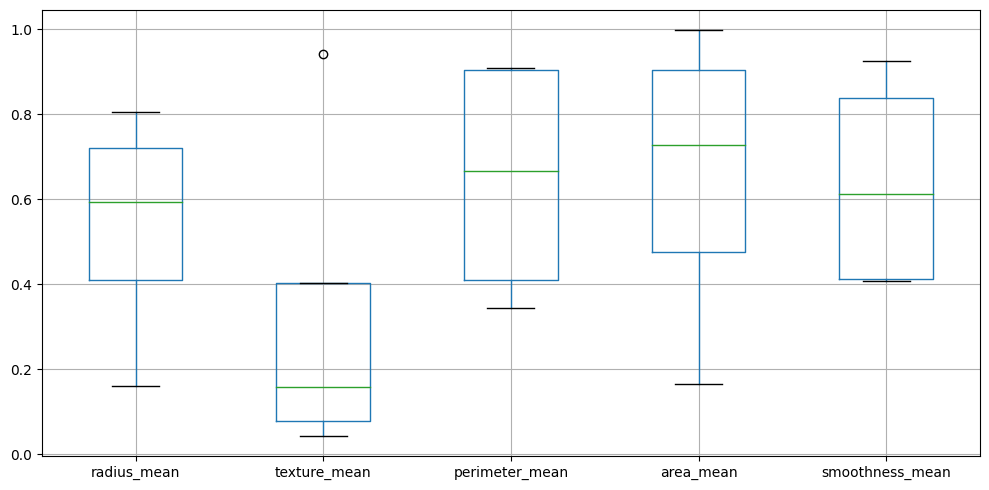

In [89]:

# Set the figure size
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

df= pd.DataFrame(data = np.random.random(size=(4,5)), columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean',])
df.boxplot()

<Axes: >

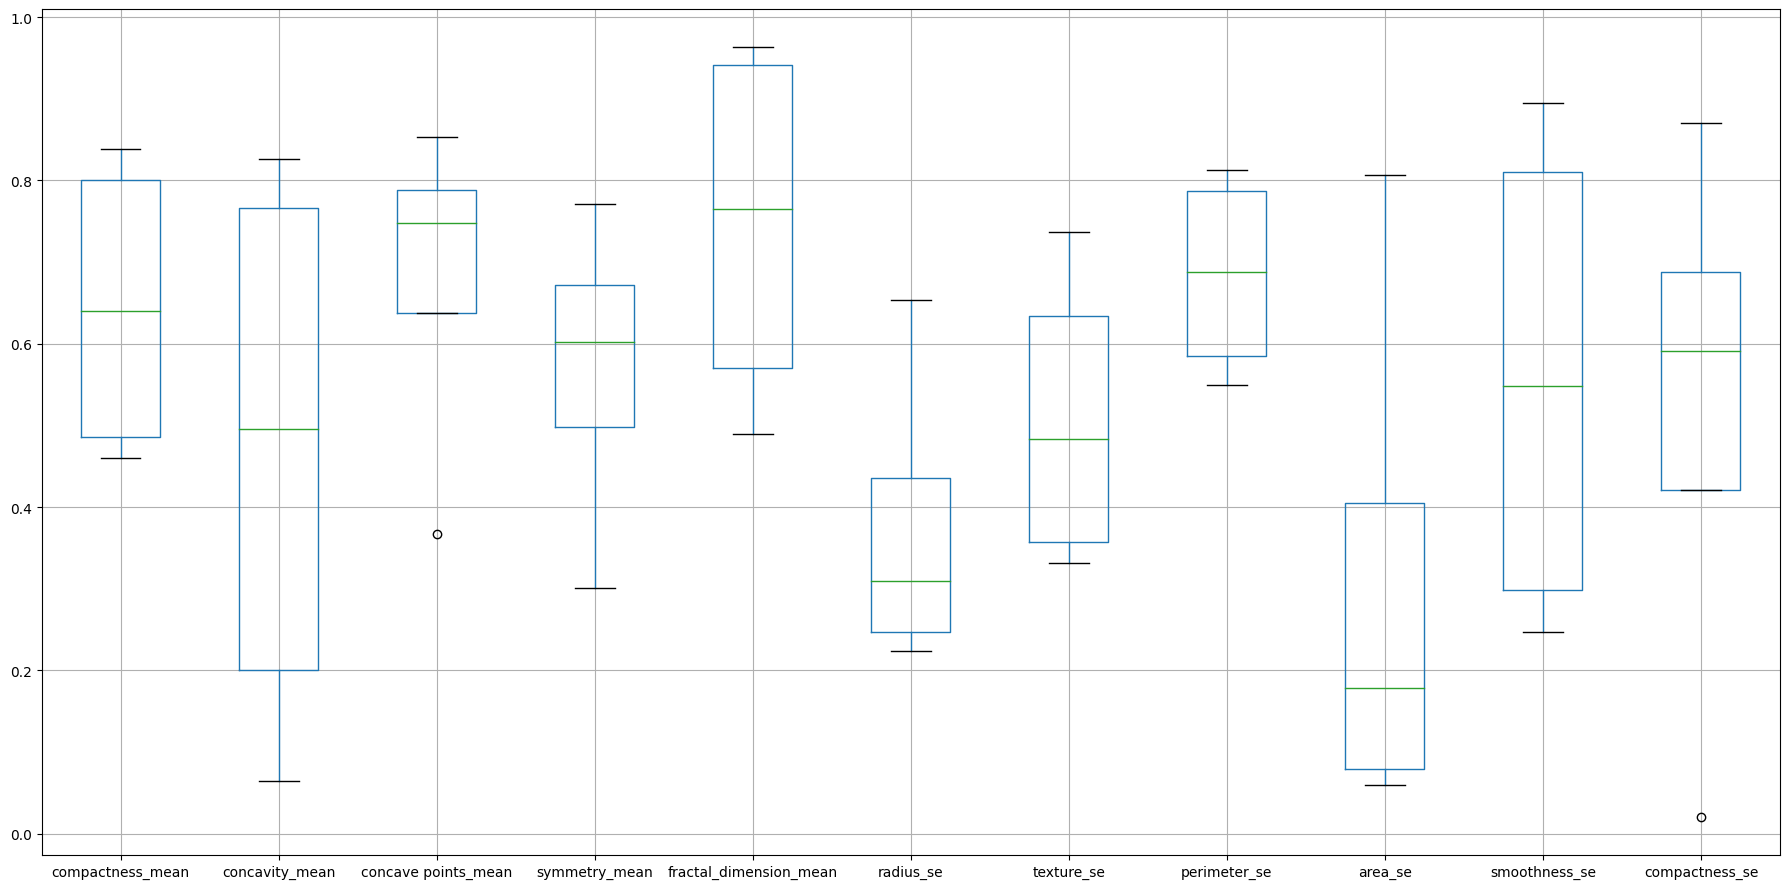

In [90]:
# Set the figure size
plt.rcParams["figure.figsize"] = [18, 9]
plt.rcParams["figure.autolayout"] = True

df1= pd.DataFrame(data = np.random.random(size=(4,11)), columns = ['compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se'])
df1.boxplot()

<Axes: >

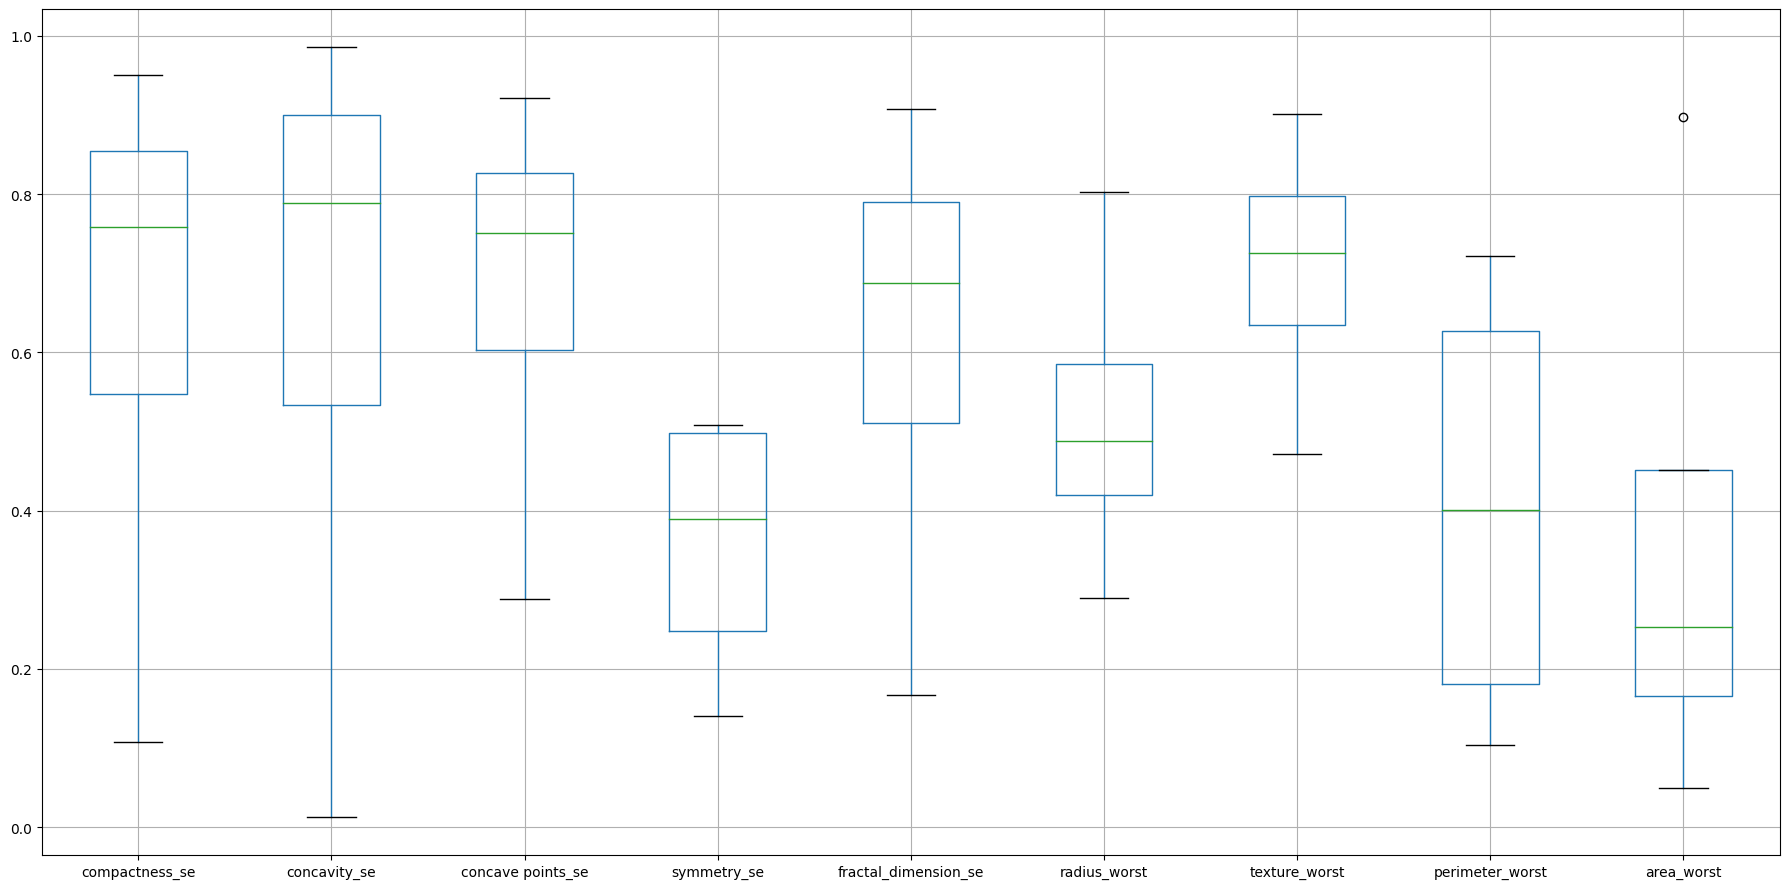

In [91]:
# Set the figure size
plt.rcParams["figure.figsize"] = [18, 9]
plt.rcParams["figure.autolayout"] = True

df2= pd.DataFrame(data = np.random.random(size=(4,9)), columns = ['compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst',])
df2.boxplot()

<Axes: >

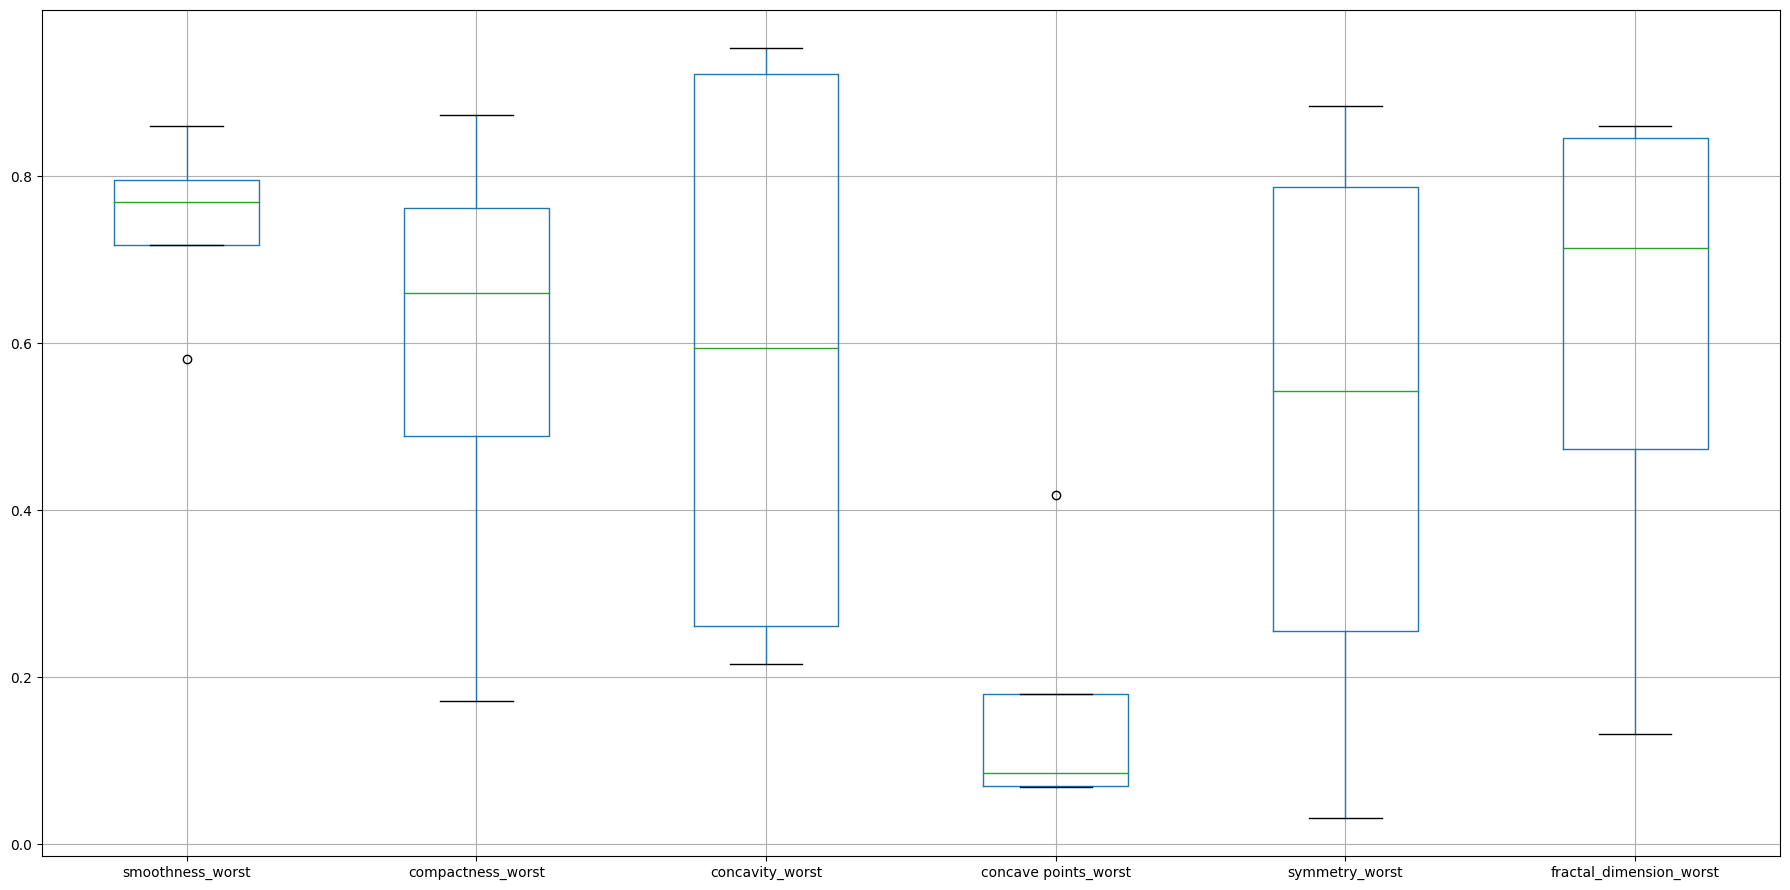

In [92]:
# Set the figure size
plt.rcParams["figure.figsize"] = [18, 9]
plt.rcParams["figure.autolayout"] = True

df3=pd.DataFrame(data = np.random.random(size=(4,6)), columns = ['smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])
df3.boxplot()

#####There a number of variables that have  few outliers in our datset , we did not drop them because the  information they carry is very critical.

#Data Engineering

In [93]:
# Encoding categorical variable "Diagnosis"
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [94]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [95]:
label_encoder = preprocessing.LabelEncoder()

data['diagnosis']= label_encoder.fit_transform(data['diagnosis'])

data['diagnosis'].unique()

array([1, 0])

In [96]:
# splitting data to label and features
label=data['diagnosis']
feat=data[['id','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [97]:
# Dimensionality reduction
feat=feat#dependent variables
label=label# target variable

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
en=LDA()

lda=en.fit(feat,label)
lda_feat=en.transform(feat)

lda.coef_

feat_imp=pd.DataFrame(index=feat.columns.values, data=lda.coef_[0].T)
feat_imp.sort_values(0,ascending=False)

,0
smoothness_se,3.056188e+02
concave points_se,2.047181e+02
fractal_dimension_worst,8.103103e+01
concave points_mean,4.008135e+01
symmetry_se,3.115856e+01
concavity_mean,2.661430e+01
symmetry_worst,1.064853e+01
smoothness_worst,9.994852e+00
concave points_worst,8.487093e+00
radius_se,8.040636e+00


In [98]:
#Selected Feature after LDA
features=feat[['smoothness_se','concave points_se','fractal_dimension_worst','concave points_mean','symmetry_se','concavity_mean','symmetry_worst','smoothness_worst',
               'concave points_worst','radius_se','concavity_worst','radius_worst','smoothness_mean','symmetry_mean','compactness_worst','compactness_se',
               'perimeter_mean','texture_worst','texture_mean','area_mean']]

In [99]:
#Assigning variables
x=features
y=label# target variable

In [100]:
#Splitting data to Train and test  sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test= train_test_split(x, y, test_size=0.3, random_state=0)

In [101]:
# Scale the features using StandardScaler
import sklearn.preprocessing
scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

###Random Forest classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=50, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [103]:
# modell fitting
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=50)

In [104]:
# model evaluation

classifier_rf.oob_score_

0.9547738693467337

#####Hyperparameter tuning for random forest classifier

In [105]:
# grid search cv
from sklearn.model_selection import GridSearchCV

In [106]:
rf = RandomForestClassifier(random_state=50, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}


In [107]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [108]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 1.28 s, sys: 196 ms, total: 1.47 s
Wall time: 1min 3s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=50),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [109]:
grid_search.best_score_

0.9498232323232323

In [110]:
# extrzcting best params
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=25,
                       n_jobs=-1, random_state=50)

In [111]:
# making predictions
y_pred =np.round(classifier_rf.predict(x_test),decimals=1)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [112]:
#comparing the actual values verses the predicted ones
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame

,Actual,Predicted
512,1,1
457,0,0
439,0,0
298,0,0
37,0,0
...,...,...
7,1,1
408,1,1
523,0,0
361,0,0


####KNN CLASSIFIER

In [113]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [114]:
# Fitting our KNN classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)



KNeighborsClassifier()

In [115]:
#Model prediction
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [116]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9415204678362573


In [117]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

[[105   3]
 [  7  56]]


In [118]:
#hyper parameter tuning using random search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
neighbor_range = np.arange(1, 41)
knn = KNeighborsClassifier()

params = {'n_neighbors' : neighbor_range,
         'weights' : ['uniform', 'distance'],
         'metric' : ['manhattan', 'euclidean', 'minkowski','hamming']}

kfolds = KFold(n_splits = 5)
rscv = RandomizedSearchCV(knn, params, random_state = 0)
rscv.fit(x_train, y_train)
print("Best parameters:", rscv.best_params_)

Best parameters: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'minkowski'}


In [119]:
# Training KNN modelusing the best parameters
knn1=KNeighborsClassifier(n_neighbors=11, weights="distance", metric='minkowski')
knn1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [120]:
# Testing for overfitting.

print('Training accuracy {:.4f}'.format(knn1.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(knn1.score(x_test,y_test)))

Training accuracy 1.0000
Testing accuracy 0.9474


In [121]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9415204678362573
[[105   3]
 [  7  56]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



###Logreg Model

In [122]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=0)

# fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

In [123]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[106,   2],
       [  4,  59]])

In [124]:

from sklearn.metrics import accuracy_score, confusion_matrix, explained_variance_score,classification_report

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9649122807017544
[[106   2]
 [  4  59]]
0.8497942386831276
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [125]:
# Optimizing the model.

from sklearn.model_selection import GridSearchCV

model1 = LogisticRegression()
param_grid = [{'penalty': ['l1', 'l2'],
               'C': np.logspace(0, 4, 5),
               'solver' : ['lbfgs', 'newton-cg', 'liblinear','saga'],
               'max_iter' : [5, 10]
               }
              ]

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(model1, param_grid = param_grid, cv=5, verbose=0, scoring = 'accuracy')

In [126]:
import warnings
warnings.filterwarnings("ignore")
# Fitting grid search
best_clf = clf.fit(x_train, y_train)
#Predicting values based on the new parameters:
y_pred = best_clf.predict(x_test)
print('Best Penalty:', best_clf.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf.best_estimator_.get_params()['C'])
print('Best Solver:', best_clf.best_estimator_.get_params()['solver'])
print('Best max_iter:', best_clf.best_estimator_.get_params()['max_iter'])
print('best_score',best_clf.best_score_)

Best Penalty: l1
Best C: 1.0
Best Solver: liblinear
Best max_iter: 10
best_score 0.9774683544303798


In [127]:
model1 =LogisticRegression(penalty='l2',C=1.0,solver='liblinear',max_iter=10, random_state=0)
model1.fit(x_train,y_train)

LogisticRegression(max_iter=10, random_state=0, solver='liblinear')

In [128]:
y_pred=model1.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [129]:
#mODEL EVALUATION
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9649122807017544
[[106   2]
 [  4  59]]
0.8497942386831276
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [130]:
print(f'Train Accuracy: {model1.score(x_train, y_train):.2f}')
print(f'Test Accuracy: {model1.score(x_test, y_test):.2f}')

Train Accuracy: 0.98
Test Accuracy: 0.96


In [131]:
#predicting using logistic regression
y_pred =np.round(model1.predict(x_test),decimals=1)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [132]:
#comparing the actual values verses the predicted ones
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame

,Actual,Predicted
512,1,1
457,0,0
439,0,0
298,0,0
37,0,0
...,...,...
7,1,1
408,1,1
523,0,0
361,0,0


#NLP

In [133]:
from sklearn.neural_network import MLPClassifier
# Creating our model
mlp = MLPClassifier()

#fitting the model

mlp.fit(x_train, y_train)

MLPClassifier()

In [135]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9649122807017544
[[106   2]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [136]:
# tuning the model
param_grid = {
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam', 'sgd', 'lbfgs']
}

#Using the classifier along with grid search:
mlp=MLPClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(mlp, param_grid = param_grid, cv= 10, verbose = 0, scoring = 'neg_mean_squared_error' )

#Fitting the grid search:
best_clf = clf.fit(x_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(x_test)

In [137]:
# getting the best parameters
best_clf.best_params_

{'alpha': 0.0001, 'learning_rate': 'adaptive', 'solver': 'adam'}

In [138]:
#Using the best parameters from hyperparameter tuning:
Final = MLPClassifier(activation = 'identity', alpha =  0.05, hidden_layer_sizes = (10,10,10),
                               learning_rate = 'adaptive', solver = 'adam',random_state=0)

In [139]:
#Fitting the model:
Final.fit(x_train,y_train )

#Predicting values:
y_pred = Final.predict(x_test)

In [140]:
# Checking for overfitting.

print('Training accuracy {:.4f}'.format(Final.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(Final.score(x_test,y_test)))

Training accuracy 0.9799
Testing accuracy 0.9591


In [141]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9590643274853801
[[105   3]
 [  4  59]]
0.8242210464432687
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [142]:
from sklearn.svm import SVC
# creading the svm model
svm= SVC(C=1, kernel ="rbf",gamma='scale',degree=3, random_state=None)
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.9824561403508771

##### Conlcusion and recomendation
* The best performing model is SVM with 98% classification accuracy followed by   NLP(natural language processing) and Logistic regression model with 96% classification accurcy followed by  Random forest  Classfier which has 95% Accuracy while  KNN is the least  performing with 94% Classification accuracy.
* For this case, since we are working with realively small dataset  SVM model  is most prefered as it works  well with data that is small and with very low noise in it, the presence of few  outliers and  missing values  Makes SVM the best. I we were working with larger dataset with  much noise in it Nlp or Logistic regression model could be the best option.

In [143]:
#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/